### Bibliotecas usadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Leitura e visualização do dataset

#### Dataset com as cinco variávels meteorológicas

In [ ]:
df_tsc = pd.read_csv('/content/drive/MyDrive/unicamp/2022s2/mo629/tsc_erosion_monitor.csv')
df_tsc.shape

(974, 11)

In [ ]:
df_tsc.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2022-11-18T03:01:22+00:00,1,17,72,1018.0,27.792,-47.0608,NaN,NaN,NaN,NaN
1,2022-11-18T03:01:38+00:00,2,17,72,1018.0,27.792,-47.0608,NaN,NaN,NaN,NaN
2,2022-11-18T03:01:57+00:00,3,17,72,1018.0,27.792,-47.0608,NaN,NaN,NaN,NaN
3,2022-11-18T03:02:14+00:00,4,17,72,1018.0,27.792,-47.0608,NaN,NaN,NaN,NaN
4,2022-11-18T03:02:33+00:00,5,17,72,1018.0,27.792,-47.0608,NaN,NaN,NaN,NaN


In [ ]:
df = df_tsc.drop(['created_at', 'entry_id', 'latitude', 'longitude', 'elevation', 'status'], axis=1)
df.shape

(974, 5)

In [ ]:
df.describe()

,field1,field2,field3,field4,field5
count,974.000000,974.000000,974.000000,974.000000,872.000000
mean,20.071869,65.808008,1015.829569,22.582645,6.946230
std,4.650031,15.475176,1.573714,7.736926,13.835397
min,15.000000,29.000000,1010.000000,7.416000,-47.060800
25%,16.000000,53.000000,1015.000000,15.444000,0.051000
50%,18.000000,72.000000,1016.000000,22.428000,0.051000
75%,24.000000,77.000000,1017.000000,27.792000,0.085000
max,31.000000,88.000000,1018.000000,50.004000,31.909000


In [ ]:
print(df.isna().sum())

field1      0
field2      0
field3      0
field4      0
field5    102
dtype: int64


In [ ]:
df.fillna( method='ffill', inplace=True)

In [ ]:
df.head()

,field1,field2,field3,field4,field5
0,17,72,1018.0,27.792,-47.0608
1,17,72,1018.0,27.792,-47.0608
2,17,72,1018.0,27.792,-47.0608
3,17,72,1018.0,27.792,-47.0608
4,17,72,1018.0,27.792,-47.0608


In [ ]:
print(df.isna().sum())

field1    0
field2    0
field3    0
field4    0
field5    0
dtype: int64


In [ ]:
df.rename({'field1': 'temperatura', 'field2': 'umidade_ar', 'field3': 'pressao_atmosferica',
           'field4': 'velocidade_vento', 'field5': 'distancia'}, axis=1, inplace=True)

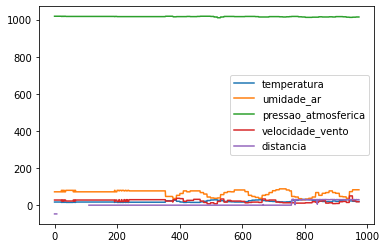

In [ ]:
df.plot()

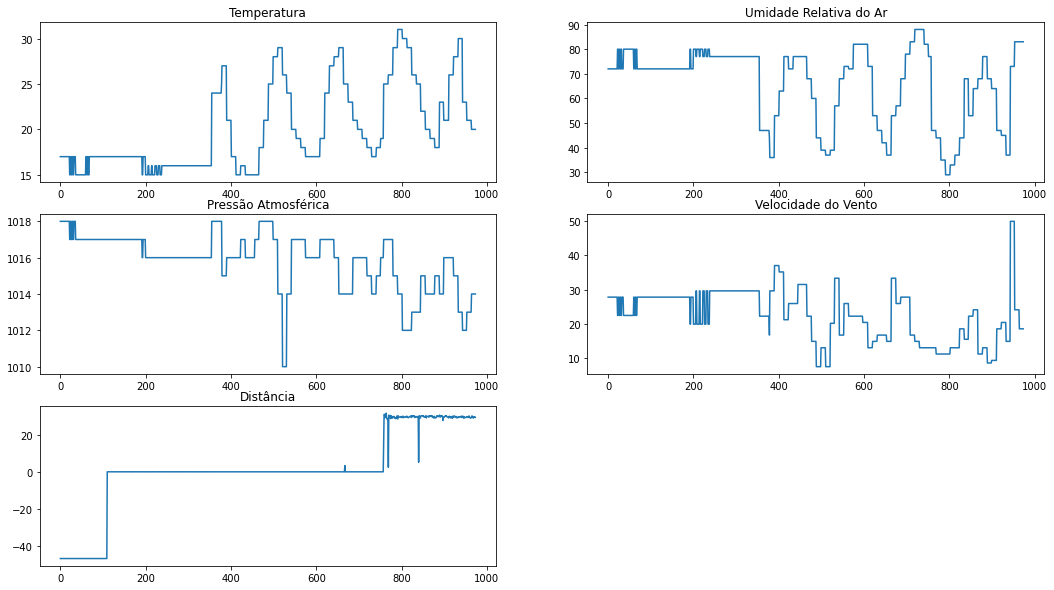

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(321)
plt.plot(df['temperatura'])
plt.title('Temperatura')

plt.subplot(322)
plt.plot(df['umidade_ar'])
plt.title('Umidade Relativa do Ar')

plt.subplot(323)
plt.plot(df['pressao_atmosferica'])
plt.title('Pressão Atmosférica')

plt.subplot(324)
plt.plot(df['velocidade_vento'])
plt.title('Velocidade do Vento')

plt.subplot(325)
plt.plot(df['distancia'])
plt.title('Distância')

plt.show()

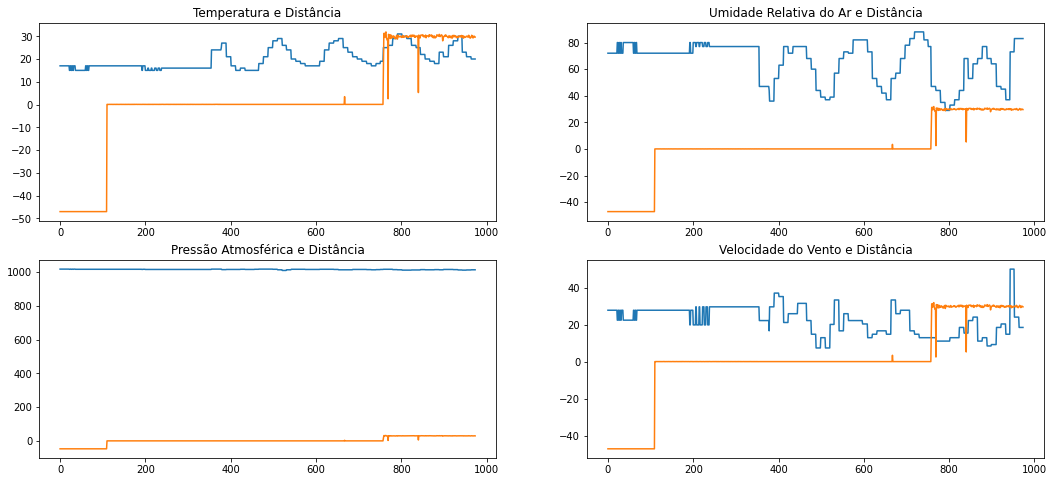

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(221)
plt.plot(df['temperatura'])
plt.plot(df['distancia'])
plt.title('Temperatura e Distância')

plt.subplot(222)
plt.plot(df['umidade_ar'])
plt.plot(df['distancia'])
plt.title('Umidade Relativa do Ar e Distância')

plt.subplot(223)
plt.plot(df['pressao_atmosferica'])
plt.plot(df['distancia'])
plt.title('Pressão Atmosférica e Distância')

plt.subplot(224)
plt.plot(df['velocidade_vento'])
plt.plot(df['distancia'])
plt.title('Velocidade do Vento e Distância')

plt.show()

### Dataframe com apenas distância

In [ ]:
df_dist = df.drop(['temperatura', 'umidade_ar', 'pressao_atmosferica', 'velocidade_vento'], axis=1)

In [ ]:
df_dist.head()

,distancia
0,-47.0608
1,-47.0608
2,-47.0608
3,-47.0608
4,-47.0608


In [ ]:
print(df_dist.isna().sum())

distancia    0
dtype: int64


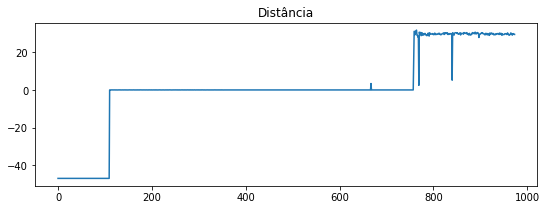

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(df_dist['distancia'])
plt.title('Distância')
plt.show()

### Análise dos dados com o KMeans

In [ ]:
X = df.values
X_dist = df_dist.values

#### Modelo

In [ ]:
class Clustering():
    def __init__(self, n_clusters):
        self.cluster = KMeans(n_clusters=n_clusters, random_state=42)
    
    def fit(self, X):
        self.cluster.fit(X)
    
    def fit_cluster_centers(self, X):
        self.cluster.fit(X)
    
    def predict(self, X):
        k = self.cluster.predict(X)
        return k

    def score(self, X):
        s = self.cluster.score(X)
        # s = metrics.silhouette_score(X, self.cluster.labels_, metric='euclidean')
        return s

#### Aplicação do modelo com as 5 variáveis

In [ ]:
score_x = []
for i in range(2,31):
  m = Clustering(n_clusters=i)
  m.fit(X)
  score_x.append(m.cluster.inertia_)

Text(0.5, 1.0, 'Elbow curve')

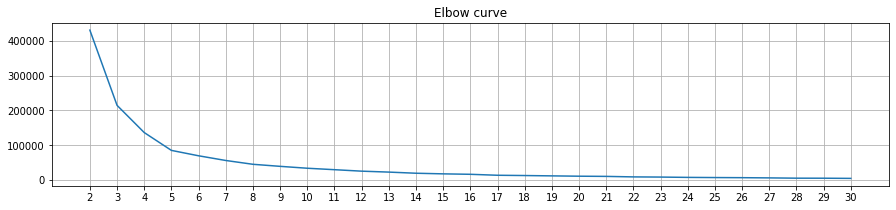

In [ ]:
fig = plt.figure(figsize=(15, 3))
plt.plot(np.arange(2,31), score_x)
plt.xticks(np.arange(2,31))
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
cl = Clustering(n_clusters=9)
cl.fit(X)
pred_5v = cl.predict(X)

In [ ]:
cl.cluster.cluster_centers_

array([[ 2.07647059e+01,  7.17882353e+01,  1.01417647e+03,
         1.54681412e+01,  2.99598000e+01],
       [ 2.20000000e+01,  5.66000000e+01,  1.01480000e+03,
         3.29616000e+01,  1.10345455e-01],
       [ 1.66416382e+01,  7.48600683e+01,  1.01640956e+03,
         2.86552628e+01,  5.43071672e-02],
       [ 1.63818182e+01,  7.44727273e+01,  1.01727273e+03,
         2.61340364e+01, -4.70608000e+01],
       [ 2.74661017e+01,  4.09576271e+01,  1.01442373e+03,
         1.52081695e+01,  2.99197119e+01],
       [ 2.64112903e+01,  4.26693548e+01,  1.01591935e+03,
         1.67539355e+01,  1.89741935e-01],
       [ 1.68292683e+01,  8.19756098e+01,  1.01565041e+03,
         1.81448780e+01,  4.90650407e-02],
       [ 1.93035714e+01,  6.81964286e+01,  1.01732143e+03,
         1.77351429e+01,  1.39642857e-01],
       [ 2.30000000e+01,  7.30000000e+01,  1.01200000e+03,
         5.00040000e+01,  2.97126000e+01]])

In [ ]:
cl.cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2,
       2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6,
       6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

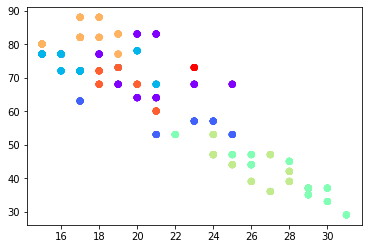

In [ ]:
plt.scatter(X[:,0], X[:,1], c=pred_5v, cmap='rainbow')
plt.show()

#### Aplicação do modelo apenas com a variável distância

In [ ]:
score_x_dist = []
for i in range(2,31):
  m = Clustering(n_clusters=i)
  m.fit(X_dist)
  score_x_dist.append(m.cluster.inertia_)

Text(0.5, 1.0, 'Elbow curve')

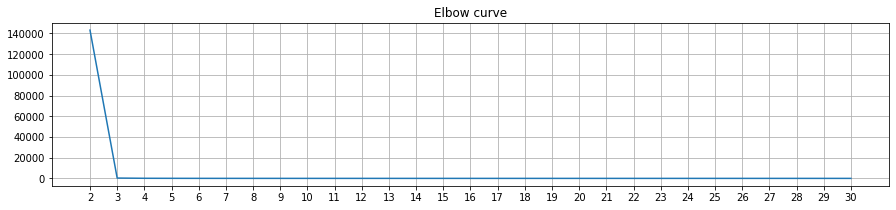

In [ ]:
fig2 = plt.figure(figsize=(15, 3))
plt.plot(np.arange(2,31), score_x_dist)
plt.xticks(np.arange(2,31))
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
cl_dist = Clustering(n_clusters=3)
cl_dist.fit(X_dist)
pred_dist = cl_dist.predict(X_dist)

In [ ]:
cl_dist.cluster.cluster_centers_

array([[  0.06826154],
       [ 29.85621028],
       [-47.0608    ]])

In [ ]:
cl_dist.cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

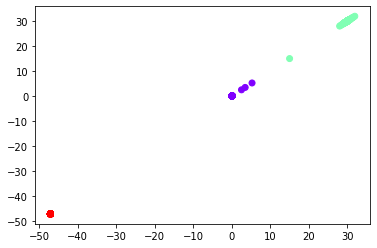

In [ ]:
plt.scatter(X_dist, X_dist, c=pred_dist, cmap='rainbow')
plt.show()